In [1]:
#importing libraries
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#importing exhibition table
exhibition_data = pd.read_csv("testing.csv")
exhibition_data.head()

,id,conferenceid,conversationid,direction,date_sent,message,sent_by,delegate_notified
0,19217,35,25923,1,2021-11-24 15:37:19,NaN,NaN,0
1,19218,35,25924,1,2021-11-24 15:37:19,NaN,NaN,0
2,19219,35,25925,1,2021-11-24 15:37:19,NaN,NaN,0
3,19220,35,25926,1,2021-11-24 15:37:19,NaN,NaN,0
4,19221,35,25939,1,2021-12-09 08:57:04,test,NaN,0


In [3]:
#filtered to just messages removing NaN values
message_data = exhibition_data.drop(columns=['id', 'conferenceid','conversationid', 'direction', 'date_sent', 'sent_by', 'delegate_notified']).dropna() 
message_data.head()

,message
4,test
5,test
6,test
7,test
8,test


In [4]:
#creating a function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function for polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creating subjectivity and polarity columns
message_data['Subjectivity'] = message_data['message'].apply(getSubjectivity)
message_data['Polarity'] = message_data['message'].apply(getPolarity)

#Updated dataframe
message_data

,message,Subjectivity,Polarity
4,test,0.000000,0.000000
5,test,0.000000,0.000000
6,test,0.000000,0.000000
7,test,0.000000,0.000000
8,test,0.000000,0.000000
...,...,...,...
843,"Hi Simon, \r\nMy colleague Tom passed me your ...",0.283333,0.266667
844,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667
845,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667
846,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667


In [5]:
#Function for negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
message_data['Analysis'] = message_data['Polarity'].apply(getAnalysis)

#updated dataframe
message_data

,message,Subjectivity,Polarity,Analysis
4,test,0.000000,0.000000,Neutral
5,test,0.000000,0.000000,Neutral
6,test,0.000000,0.000000,Neutral
7,test,0.000000,0.000000,Neutral
8,test,0.000000,0.000000,Neutral
...,...,...,...,...
843,"Hi Simon, \r\nMy colleague Tom passed me your ...",0.283333,0.266667,Positive
844,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667,Positive
845,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667,Positive
846,"Hi Baiju, \r\nMy colleague Tom passed me your ...",0.283333,0.266667,Positive


In [6]:
#Percentage of positive messages
positiveMessages = message_data[message_data.Analysis == 'Positive']
positiveMessages = positiveMessages['message']

round((positiveMessages.shape[0] / message_data.shape[0]) * 100, 1)

73.0

In [7]:
#percentage of negative messages
negativeMessages =message_data[message_data.Analysis == 'Negative']
negativeMessages =negativeMessages['message']

round((negativeMessages.shape[0] / message_data.shape[0]) * 100, 1)

3.9

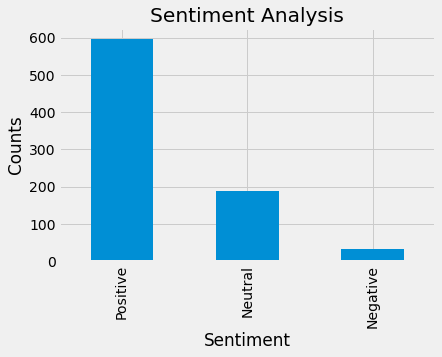

In [8]:
#value vounts
message_data['Analysis'].value_counts()

#visualizing counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
message_data['Analysis'].value_counts().plot(kind='bar')
plt.show()